# Module 4 Code Examples

## Intro to Visualizations with Matplotlib

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
datasaurus = pd.read_csv('DatasaurusDozen.tsv',sep='\t') #instead of being comma separated, the data is tab separated; you can still use the same method to load the data, but just have to specify the separator as sep='\t'
datasaurus
datasaurus['dataset'].unique() # lists the unique values in this column - shows that there are 13 different datasets we can plot

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

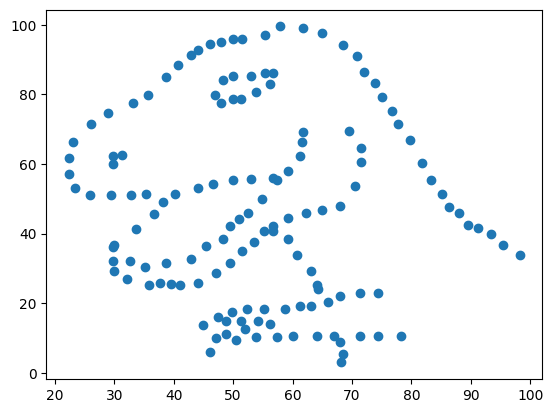

In [12]:
#the syntax for a basic scatterplot is plt.scatter(x,y)
plt.scatter(datasaurus['x'][datasaurus['dataset']=='dino'],datasaurus['y'][datasaurus['dataset']=='dino'], color=None) #only selects the x and y columns of the dataframe where the dataset is 'dino'

Now, let's look at all of the datasets at the same time -- to do this, we will need to create subplots

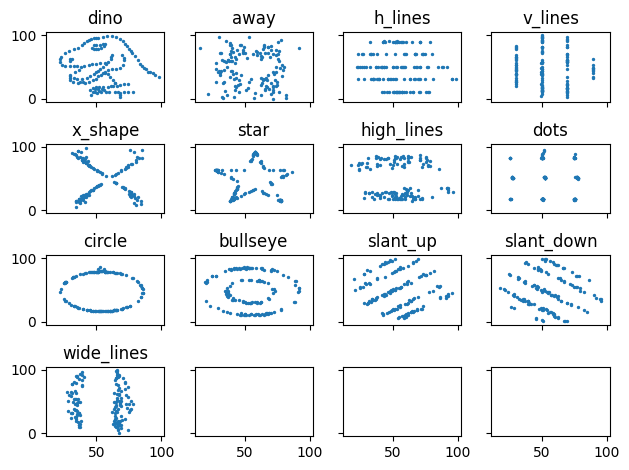

In [13]:
datasets = datasaurus['dataset'].unique().tolist() # converts this to a list that we can iterate over to create plots
fig, ax = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True) #creates a 4x4 grid of subplots; since we set sharex and sharey to true, all plots will have the same scale of their axes
axes = ax.flatten() #essentially this converts the 2D 4x4 grid to a 1D index -- instead of referencing the plot at the first row of second column like [1][0] (remember zero indexing), we can now reference it as 4
for i, dataset in enumerate(datasets): #iterates over all of the items in the datasets list. Enumerate is used to return both the value from the list as well as its index in the list. The index is used to match the dataset to a respective subplot
    ax = axes[i] #selects the proper subplot to add the data to
    ax.scatter(datasaurus['x'][datasaurus['dataset']==dataset],datasaurus['y'][datasaurus['dataset']==dataset],s=2) #specifies the data to use for each subplot
    ax.set_title(dataset) #sets the title of each subplot
fig.tight_layout() #prevents subplots from overlapping
pass; #suppresses text output

### Visualizing Iris Dataset

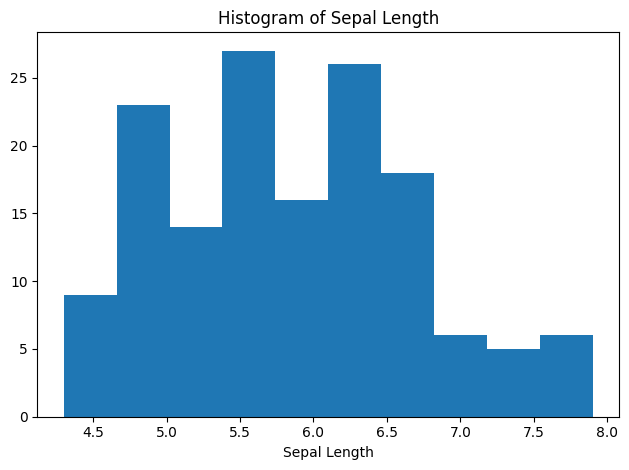

In [14]:
iris_df = pd.read_csv('iris.csv')
#simple example
fig, ax = plt.subplots()
ax.hist(iris_df["sepal.length"])
ax.set_xlabel("Sepal Length")
ax.set_title('Histogram of Sepal Length')
fig.tight_layout()

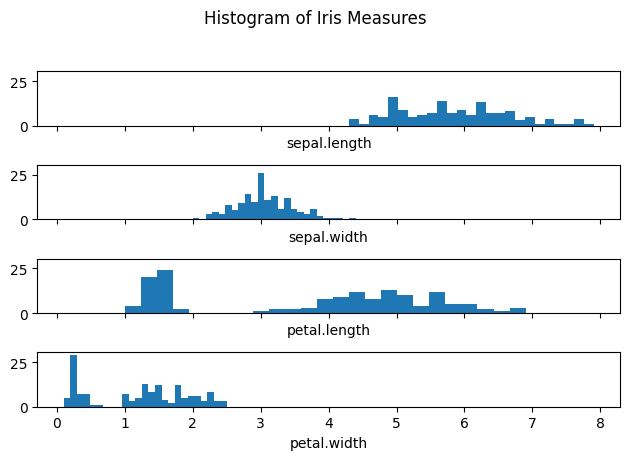

In [15]:
# showing histograms of all of the variables
cols = iris_df.columns.to_list()[:4] # creating a list of columns without the 'variety' column as we cannot plot this
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True)
for i,col in enumerate(cols):
    ax[i].hist(iris_df[col],bins=25) #specify the number of bins to use to get more detail
    ax[i].set_xlabel(iris_df.keys()[i])
    fig.suptitle('Histogram of Iris Measures') #set overall title
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
pass;

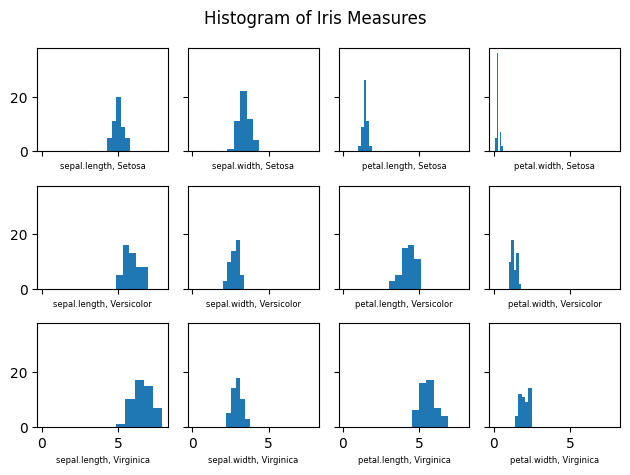

In [16]:
varieties = iris_df['variety'].unique()
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True)
for i, var in enumerate(varieties):
    for j,col in enumerate(cols):
        ax[i][j].hist(iris_df[col][iris_df['variety']==var],bins=5) #specify the number of bins to use to get more detail
        ax[i][j].set_xlabel(f"{col}, {var}",fontsize=6)
        fig.suptitle('Histogram of Iris Measures') #set overall title
        fig.tight_layout()
pass;

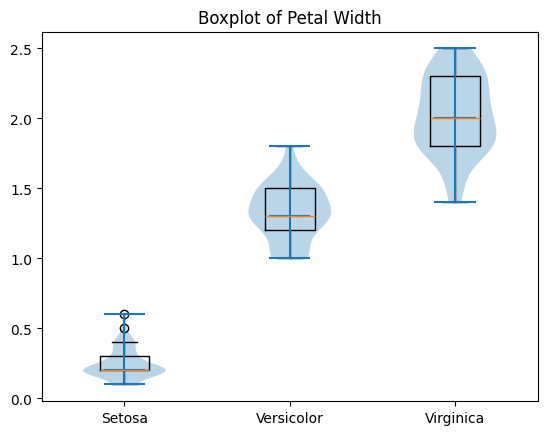

In [17]:
labels = [0,0,0]
dataGrps = [0,0,0]
for i, var in enumerate(varieties): #preparing data to be plotted
    labels[i]=var
    dataGrps[i]=list(iris_df['petal.width'][iris_df['variety']==var])

fig, ax = plt.subplots() 
ax.boxplot(dataGrps)
ax.set_xticklabels(labels)
ax.set_title('Boxplot of Petal Width')
ax.violinplot(dataGrps, showmedians=True)
pass;